<a href="https://colab.research.google.com/github/pathikritsyam/ECTA/blob/main/ARIMA/DE_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ARIMA MODEL

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_predict
from scipy.optimize import differential_evolution
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dtypes = {'temp': np.float64, 'dew_point_temp':np.float64, 'rel_hum':np.float64,
          'wind_speed': np.float64, 'visibility': np.float64, 'press': np.float64,
          'hmdx': np.float64, 'wind_chill': np.float64, 'weather': np.object,
         'hour_of_day': np.float64, 'year': np.float64, 'month': np.float64,
         'day_of_week': np.float64, 'day_of_year': np.float64, 'week_of_year': np.float64,
          'quarter': np.float64, 'stat_hol': 'category', 'day_light_hours': 'category',
          'hourly_demand': np.float64, 'daily_peak': np.float64}


df_orig = pd.read_csv("/content/clean-cut.csv", parse_dates=True,
                 dtype=dtypes, index_col=0, infer_datetime_format=True)

daymapper = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
weekdaymapper = {0.0: 'Weekday', 1.0: 'Weekday', 2.0: 'Weekday', 3.0: 'Weekday', 4.0: 'Weekday',
                 5.0: 'Weekend', 6.0: 'Weekend'}
df_orig['dayofweek'] = df_orig['day_of_week'].map(daymapper)
df_orig['daytype'] = df_orig['day_of_week'].map(weekdaymapper)

In [ ]:
data=df_orig['temp'].astype('float64')
train=data[:288]
test=data[288:388]

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(data)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

KeyboardInterrupt: ignored

In [ ]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=13.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=20265.085, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=15656.839, Time=2.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=9.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=18104.170, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=15473.765, Time=5.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=26.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.30 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=15941.381, Time=3.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=15332.336, Time=7.98 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=15549.544, Time=3.79 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=38.62 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=13.37 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=15333.341, Time=12.84 sec
 ARIMA(2,1,1)(2,1,0)[12]            

In [ ]:
import statsmodels.api as sm

In [ ]:
p=5
d=1
q=0

In [ ]:
model=ARIMA(train, order=(p,d,q))
model_fit=model.fit()

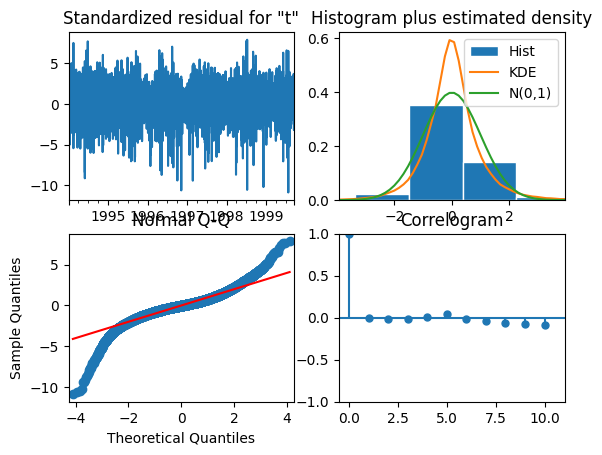

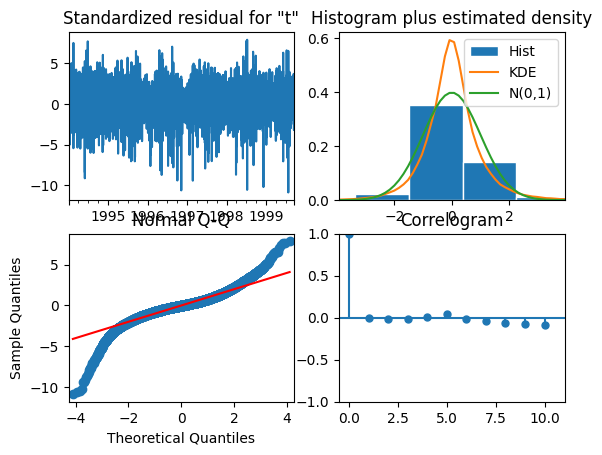

In [ ]:
model_fit.plot_diagnostics()

In [ ]:
predictions=model_fit.forecast(steps=24)

<Axes: >

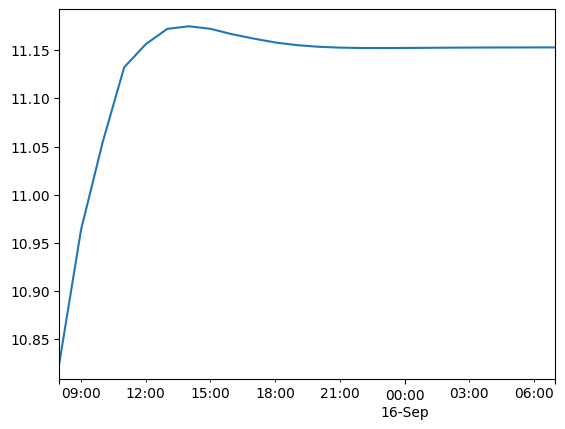

In [ ]:
predictions.plot()

<Axes: >

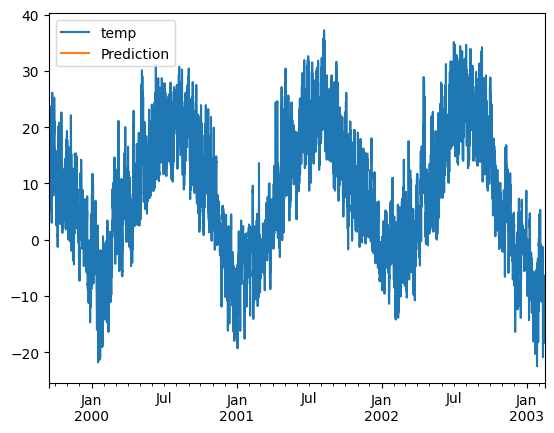

In [ ]:
future_forecast = pd.DataFrame(predictions,index = test.index,columns=["Prediction"])
pd.concat([test,future_forecast],axis=1).plot()